# Korean word 2350
총 두 종류의 Dataset Class를 만들 것이다.

### 1. 학습 input으로 사용할 Dataset
기존 알파벳 클래스와 동일한 형태이다.

- info (Category, Font, Alphbet Vector)
- Normalized Image Vector
- Length
- 폰트마다 카테고리가 정해진 후 만들 것

---


### 2. 다용도로 사용될 Dataset (임베딩 등)

- Image Vector
- Label (예: 102 index / one-hot)
- split 없이 2350의 길이를 갖는 데이터셋
- 107 * 2350 = 251450개가 만들어질 것
- 파일 이름은 '{폰트 인덱스}_{글자 인덱스}' <br/>
    예) 108_2340.png

In [1]:
import os
import glob

In [2]:
words = []
with open('./dataset/kor/korean_2350.txt', 'r', encoding='cp949') as f:
    kor_words = f.read()
    for kor_word in kor_words:
        words.append(kor_word)

In [3]:
words = sorted(words)

In [4]:
words[:10]

['가', '각', '간', '갇', '갈', '갉', '갊', '감', '갑', '값']

In [5]:
len(words)

2350

In [6]:
fonts = []
for font in glob.glob('collection/fonts_kor/*.ttf'):
    fonts.append(font[21:])

In [7]:
fonts = sorted(fonts)

In [8]:
fonts[:10]

['나눔손글씨 가람연꽃.ttf',
 '나눔손글씨 갈맷글.ttf',
 '나눔손글씨 강부장님체.ttf',
 '나눔손글씨 강인한 위로.ttf',
 '나눔손글씨 고딕 아니고 고딩.ttf',
 '나눔손글씨 고려글꼴.ttf',
 '나눔손글씨 곰신체.ttf',
 '나눔손글씨 규리의 일기.ttf',
 '나눔손글씨 금은보화.ttf',
 '나눔손글씨 기쁨밝음.ttf']

In [9]:
len(fonts)

109

In [18]:
# 하나손글씨, 동화또박 제거
fonts.remove('나눔손글씨 동화또박.ttf')
fonts.remove('나눔손글씨 하나손글씨.ttf')

In [24]:
len(fonts)

107

---
### 폰트별 이미지 생성
gitignore 처리됨

In [26]:
from PIL import Image,ImageDraw,ImageFont

In [25]:
def save_kor_font_word(word, canvas_size, font_style, file_name):
    canvas = Image.new('L', (canvas_size, canvas_size), color=255)
    draw = ImageDraw.Draw(canvas)
    
    font_style = './collection/fonts_kor/' + font_style
    try:
        font = ImageFont.truetype(font_style, size=80) # 150
        w, h = draw.textsize(word, font=font)    
        draw.text(((canvas_size-w)/2,(canvas_size-h)/5), word, fill=(0), font=font)

        canvas.save(file_name, "PNG")
    except Exception as e:
        print(font_style + '(' + word + ')' + ' : ' + str(e))

In [27]:
canvas_size = 128
for (idx, font) in enumerate(fonts):
    for (jdx, word) in enumerate(words):
        filename = './collection/img/korean/{}_{}.png'.format(idx, jdx)
        save_kor_font_word(word, canvas_size, font, filename)

In [29]:
len(glob.glob('./collection/img/korean/*.png')) # 107*2350

251450

---
### obj 파일로 변환

In [2]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import absolute_import

import argparse
import glob
import os
import pickle as pickle
import random
import torch

def pickle_examples_kor(from_dir, train_path):
    """
    Compile a list of examples into pickled format, so during
    the training, all io will happen in memory
    """
    paths = glob.glob(os.path.join(from_dir, '*.png')) # 카테고리 폴더 내 모든 png 파일
    with open(train_path, 'wb') as ft:
        train_count = 0
        
        for p in sorted(paths):
            label = os.path.basename(p) # 파일 이름을 저장(한글 이름이 저장될 것))
            with open(p, 'rb') as f:
                img_bytes = f.read()
                r = random.random()
                example = (label, img_bytes)
                
                # pickle.dump(example, ft)
                torch.save(example, ft)
                train_count += 1
    print('{} imgs saved in train.obj, end'.format(train_count))
    return

In [31]:
from_dir = './collection/img/korean/'
save_dir_kor = './dataset/kor/latent.obj'

In [34]:
pickle_examples_kor(from_dir, save_dir_kor)

251450 imgs saved in train.obj, end


---
### 샘플 출력
font의 기본 정보만을 보여주는 새로운 클래스를 사용

In [7]:
from common.dataset import PickledImageProvider
from common.dataset import LatentInfo
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
directory = 'dataset/kor/latent.obj'
dset = LatentInfo(PickledImageProvider(directory))

processed 1000 examples
processed 2000 examples
processed 3000 examples
processed 4000 examples
processed 5000 examples
processed 6000 examples
processed 7000 examples
processed 8000 examples
processed 9000 examples
processed 10000 examples
processed 11000 examples
processed 12000 examples
processed 13000 examples
processed 14000 examples
processed 15000 examples
processed 16000 examples
processed 17000 examples
processed 18000 examples
processed 19000 examples
processed 20000 examples
processed 21000 examples
processed 22000 examples
processed 23000 examples
processed 24000 examples
processed 25000 examples
processed 26000 examples
processed 27000 examples
processed 28000 examples
processed 29000 examples
processed 30000 examples
processed 31000 examples
processed 32000 examples
processed 33000 examples
processed 34000 examples
processed 35000 examples
processed 36000 examples
processed 37000 examples
processed 38000 examples
processed 39000 examples
processed 40000 examples
processed

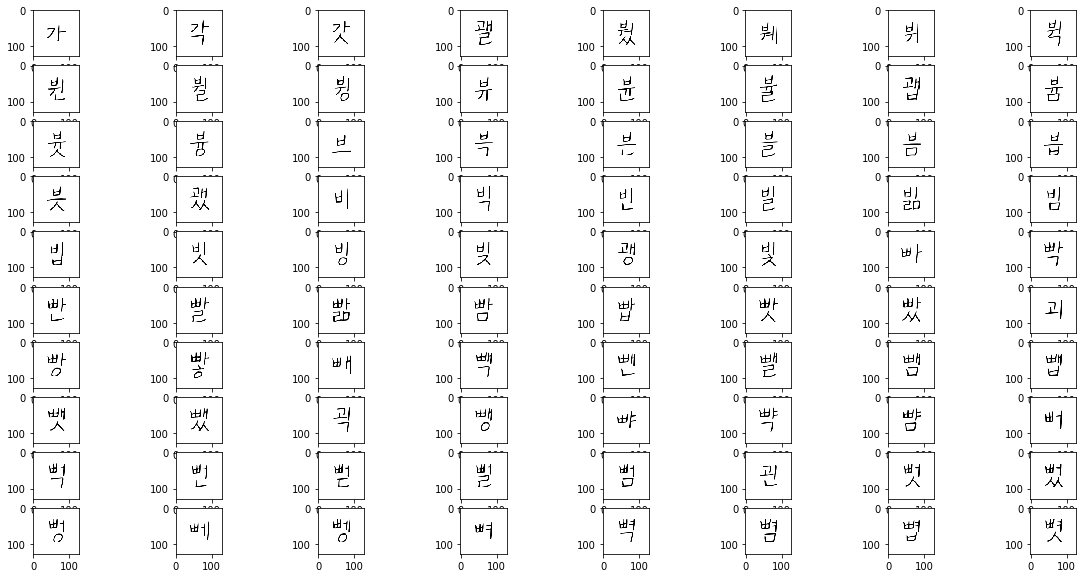

In [8]:
plt.figure(figsize=(20, 10))
for idx in range(80):
    plt.subplot(10, 8, idx+1)
    plt.imshow(dset[idx][1], cmap='gray', label=idx)
plt.show()

In [9]:
len(dset)

251450

In [10]:
dset[0]

({'font_index': '0', 'word_index': '0'}, array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))